<h4>Pratik Jogdand</h4>
AD80255

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
x_train = np.loadtxt(fname = 'mnist_data.txt',dtype = 'longlong')
y_train = np.loadtxt(fname = 'mnist_labels.txt',dtype = 'longlong')

It is defined in the question that <b>I can chose 8 <i>or</i> any of the other number</b> to make this a 2 class logistic regression model. So I will be considering <b>7 </b> as my true class and rest of them would be 0. 

In [4]:
for i in range(len(y_train)):
    if y_train[i] == 7:
        y_train[i] = 1
    else:
        y_train[i] = 0

<b>Defining the sigmoid function for logistic regression</b>

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<b> Defining the Gradient function. <i> Without Lambda </i></b>

In [48]:
def gradientWithoutLambda(grad,error,x_train):
    return grad + (error*x_train)

<b> Defining the Gradient function. <i> With Lambda </i></b>

In [7]:
def gradientWithLambda(grad,error,x_train,lambdaa,w):
    return (grad + (error*x_train) ) - (2*lambdaa*w)

<h4>Now I will try logistic regression with and without lambda.</h4>

<i>(1) Without Lambda </i> 

In [49]:
def train():
    learningRate = 0.001
    w = np.zeros((1,784),dtype = 'longlong')  
    for _ in range (0,10):                                           #10 epochs
        grad = np.zeros((1,784),dtype = 'longlong') 
        pred = 0 
        for i in range(len(x_train)):
            error = 0
            z = np.dot(w,x_train[i])
            pred = sigmoid(z)   
            error = y_train[i] - pred
            grad = gradientWithoutLambda(grad,error,x_train[i])
        w = w + learningRate * grad 
    return w

Function to print accuracy:

In [50]:
def accuracy(w):
    currentAccuracy = 0
    for i in range(len(x_train)):
        z=np.dot(w,x_train[i])
        p = sigmoid(z)
        predicted = 1 if p > 0.9 else 0
        if y_train[i] - predicted == 0: currentAccuracy += 1 
    return (currentAccuracy/len(x_train)*100)

<b> Accuracy of 7-vs-others problem. </b>

In [54]:
w = train()
print(accuracy(w),"%")

97.54 %


<b>To print weight vector. </b>

In [15]:
import warnings
warnings.filterwarnings('ignore')

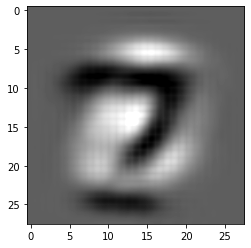

In [55]:
w = ((w - w.max()) * (1/(w.min() - w.max()) * 255)).astype('uint8') #Doing this to avoid all the pixels being black in the plot. 
w = w.reshape(28,28)
plt.imshow(w,interpolation='sinc',cmap='gray')
plt.show()

<b>Brief paragraph</b>

This image tells us about what the weights have learned. We have selected 7 as the true class in the beginning and thus, as our accuracy is way over 90%, the weights learned have started to take form as a 7. This is due to intensive training where repeatative pixels have had the same/similar pixel values (0-255) and thus, for 7, it has started to look like a 7 to predict the true class. 

<i>(2) With Lambda </i>

In [22]:
def train(L):
    w = np.zeros((1,784),dtype = 'longlong')  
    for _ in range (0,10):                                                          # 10 epochs
        grad = np.zeros((1,784),dtype = 'longlong')   
        pred = 0    
        for i in range(len(x_train)):
            error = 0
            z = np.dot(w,x_train[i])
            pred = sigmoid(z)
            error = y_train[i] - pred
            grad = gradientWithLambda(grad,error,x_train[i],L,w)
        w = w + (0.0001 * grad)
    return w

In [45]:
def printweight(w):    
    w = ((w - w.max()) * (1/(w.min() - w.max()) * 255)).astype('uint8') #Doing this to avoid all the pixels being black in the plot. 
    w = w.reshape(28,28)
    plt.imshow(w,interpolation='sinc',cmap='gray')
    plt.show()

For current Lambda value:  0.0001 Accuracy is:  97.57000000000001


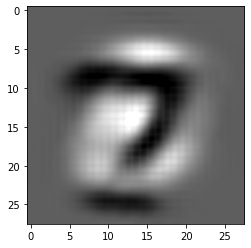

For current Lambda value:  0.0003 Accuracy is:  97.53


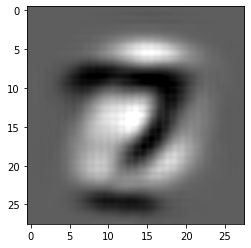

For current Lambda value:  0.001 Accuracy is:  97.59


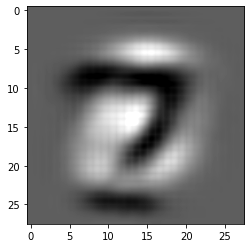

For current Lambda value:  0.003 Accuracy is:  97.6


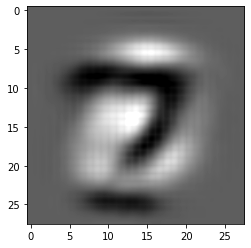

For current Lambda value:  0.01 Accuracy is:  97.57000000000001


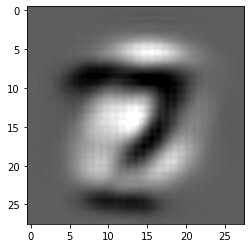

For current Lambda value:  0.03 Accuracy is:  97.45


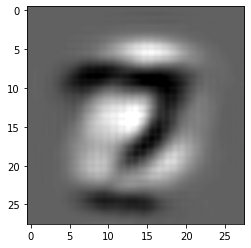

For current Lambda value:  0.1 Accuracy is:  89.72


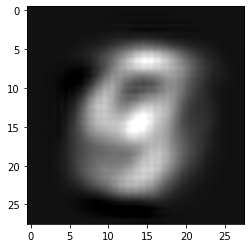

For current Lambda value:  0.3 Accuracy is:  89.72


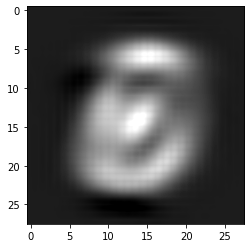

For current Lambda value:  1 Accuracy is:  10.280000000000001


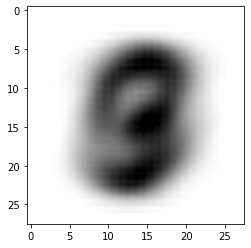

For current Lambda value:  3 Accuracy is:  10.280000000000001


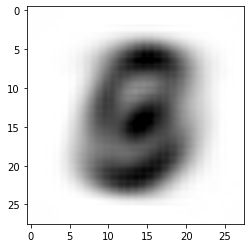

In [46]:
lambdaValuesToTest = [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1,3]
accuracies = []
for l in range(len(lambdaValuesToTest)):
    w = 0
    w = train(lambdaValuesToTest[l])
    accuracies.append(accuracy(w))
    print("For current Lambda value: ", lambdaValuesToTest[l], "Accuracy is: ", accuracies[l])
    printweight(w)

Printing accuracy as a function of lambda or printing accuracies for different lambda values. 

Text(0, 0.5, 'Accuracy')

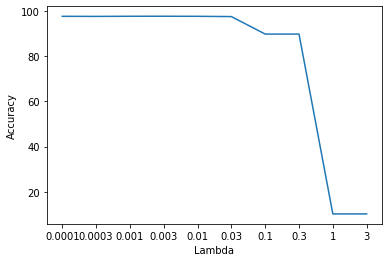

In [44]:
lambdaValuesToTest = [str(x) for x in lambdaValuesToTest] 
plt.plot(lambdaValuesToTest,accuracies)
plt.xlabel("Lambda")
plt.ylabel("Accuracy")

As the graph depicts, we start using a very small lambda value in the gradient descent. In the beginning the model underperforms but soon overtakes the accuracy and it brings up our accuracy to 97.6 up from 97.54 when we do it without the lambda function. The accuracy stays constant for a bit but as soon as we start increasing the lambda values, it starts to fall. I think this due to erratic changes in the gradient we are trying to find and the model is not able to find the lowest point in the graph using gradient descent due to its large steps (or heavy penalisation), Thus bringing down the accuracy all together. Once the lambda value go above 0 and they are set as positive integers, the accuracy even falls below 11%.

Regularization will improve the accuracy of the model, but not in every case. Here we can see that using specific lambda values we were able to beat the accuracy of logistic regression without regularization, but for that some testing is needed, or else the model will lead to overfitting and ultimately poor performance. 

References:
https://beckernick.github.io/logistic-regression-from-scratch/ <br>
https://dchandra.com/machine%20learning/statistics/2019/01/07/Logistic-regression-from-scratch.html <br>
Lecture Notes.